<a href="https://colab.research.google.com/github/ecloguehwang/HSS/blob/master/%EC%84%A0%ED%98%B8%EB%8C%80%ED%95%99_2022D%EA%B3%A03_RPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#구글 코랩(colab) 한글 깨짐 현상 해결방법: 실행 - 런타임 재실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
#pandas, openpyxl 라이브러리 부르기
import pandas as pd
import numpy as np
import os
import openpyxl
import csv
import matplotlib.pyplot as plt

##  데이터 부르기 : 구글colab에 마운트(mount)하는 방법: 왼쪽 폴더아이콘을 누르기-눈동자 왼쪽 파일마운트 아이콘 클릭- /content/drive/MyDrive/python폴더의 susi_2021simple.csv파일을 불러옴
path = '/content/drive/MyDrive/python/deungchon/'
df = pd.read_csv(f'{path}susi_jsi.csv', encoding = 'cp949')
#df = pd.read_csv(f'{path}susi_jsi_noname.csv', encoding = 'cp949')

# 첫 5줄을 봅니다.
df.head(1)

In [2]:
#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

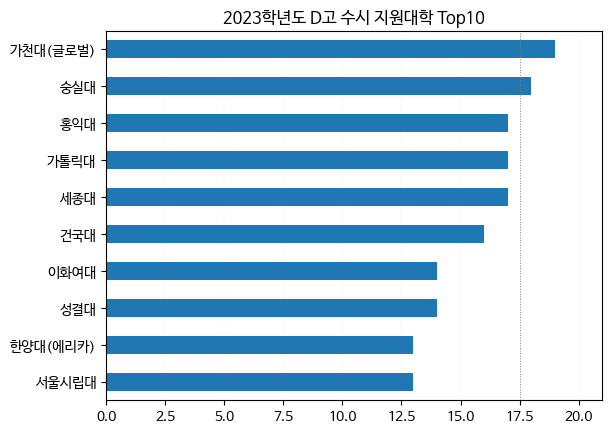

In [38]:
#2023학년도 Top10 수시지원대학 조회

import pandas as pd
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/python/deungchon/'
df = pd.read_csv(f'{path}susi_jsi.csv', encoding='cp949')


#지원시기: 수시
df_apply = df[df.지원시기  == '수시']


# Filter the rows based on the frequency of the "대학" column
freq = df_apply['대학'].value_counts()
freq = freq[freq >= 13]


#대학수
freq_num = len(freq)

# Create a horizontal bar plot with descending order
freq.sort_values().plot(kind='barh')

# Draw a dotted vertical line only from the X-axis tick with 17.5
for pos in plt.gca().get_xticks():
    if pos == 17.5:
        plt.axvline(pos, linestyle=':', color='gray', linewidth=0.7)
    else:
        plt.axvline(pos, linestyle=':', color='gray', linewidth=0.1)

# Save the plot in png and pdf formats
path1 = '/content/drive/MyDrive/python/deungchon/result_d/'


plt.title(f"2023학년도 D고 수시 지원대학 Top{freq_num}")
plt.savefig(f'{path1}uni_preferred.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{path1}uni_preferred.pdf', bbox_inches='tight')
plt.show()

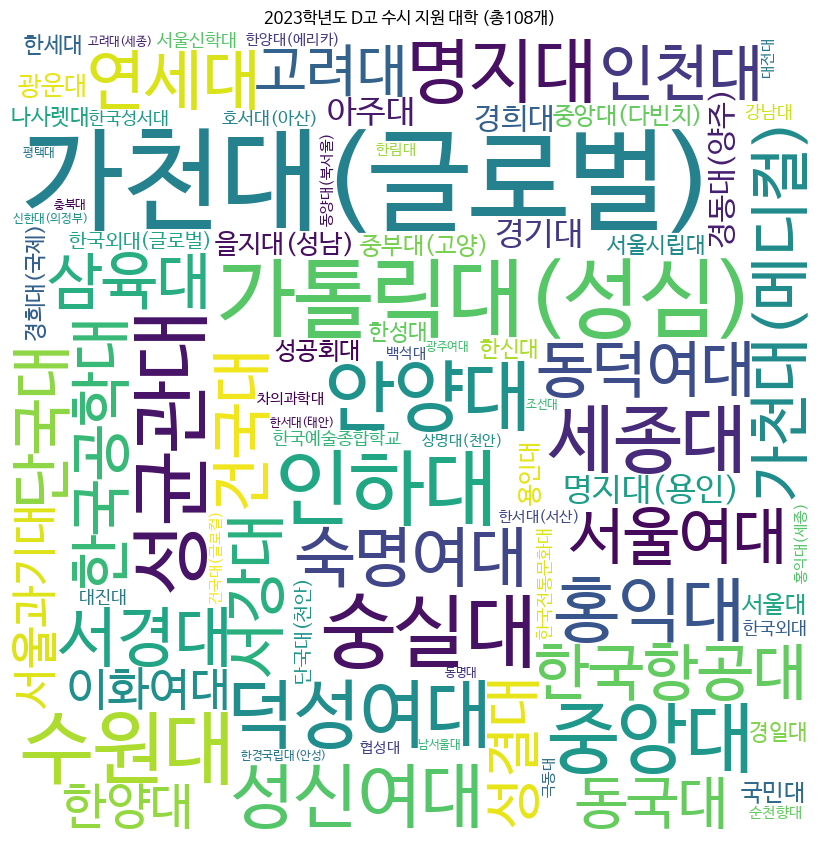

In [52]:
#빈도를 가지고 단어구름(wordcloud): 2023학년도 - 작년!

import random
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datetime

# Get the current year
current_year = datetime.datetime.now().year


# Assuming the academic year starts this year and continues into the next year
academic_year = f"{current_year}학년도"


#지원시기: 수시
df_apply = df[df.지원시기  == '수시']

#대학수
df_dup = df_apply.drop_duplicates('대학')
df_freq = len(df_dup['대학'])

#결과를 하나로 고정
random.seed(42)  # set the random seed

path = '/content/drive/MyDrive/python/deungchon/'
df = pd.read_csv(f'{path}susi_jsi.csv', encoding='cp949')

wordcloud = WordCloud(font_path='NanumBarunGothic', width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(df_apply['대학'].value_counts())

fig = plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)


# Now update the title string to include the current academic year
plt.title(f"{academic_year} D고 수시 지원 대학 (총{df_freq}개)")

path1 = '/content/drive/MyDrive/python/deungchon/result_d/'
pdf_path = f'{path1}uni_wordcloud.pdf'
plt.savefig(pdf_path, dpi=300, bbox_inches='tight', pad_inches=0)

path2 = '/content/drive/MyDrive/python/deungchon/wordclouds/'
wordcloud.to_file(f'{path2}uni_wordcloud.png')

plt.show()


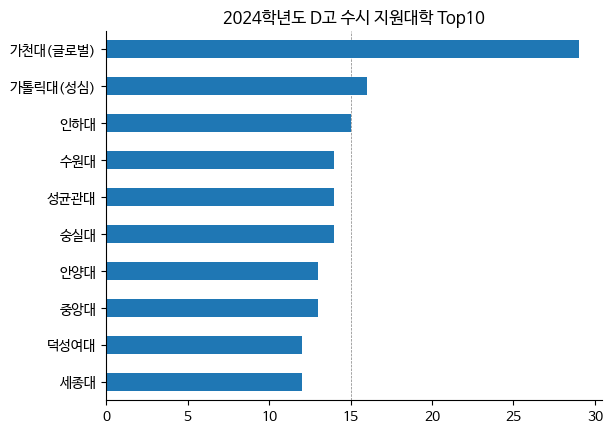

In [39]:
#2024학년도 D고 수시 지원대학 검색

import pandas as pd
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/python/deungchon/'
df = pd.read_csv(f'{path}susiapply_total.csv', encoding='cp949')

# 8회이상 지원한 대학을 필터링
freq = df['대학'].value_counts()
freq = freq[freq >= 12]

#지원대학 수
freq_num = len(freq)

# Create a horizontal bar plot with descending order
ax = freq.sort_values().plot(kind='barh')

# Draw a transparent vertical line at x=17.5 behind the bars
ax.axvline(x=15, color='black', linestyle='--', linewidth=0.5, alpha=0.5, zorder=-1, clip_on=False)

# Save the plot in png and pdf formats
path1 = '/content/drive/MyDrive/python/deungchon/result_d/'


plt.title(f"2024학년도 D고 수시 지원대학 Top{freq_num}")
#plt.savefig(f'{path1}uni_preferred.png', dpi=300, bbox_inches='tight')
#plt.savefig(f'{path1}uni_preferred.pdf', bbox_inches='tight')


# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

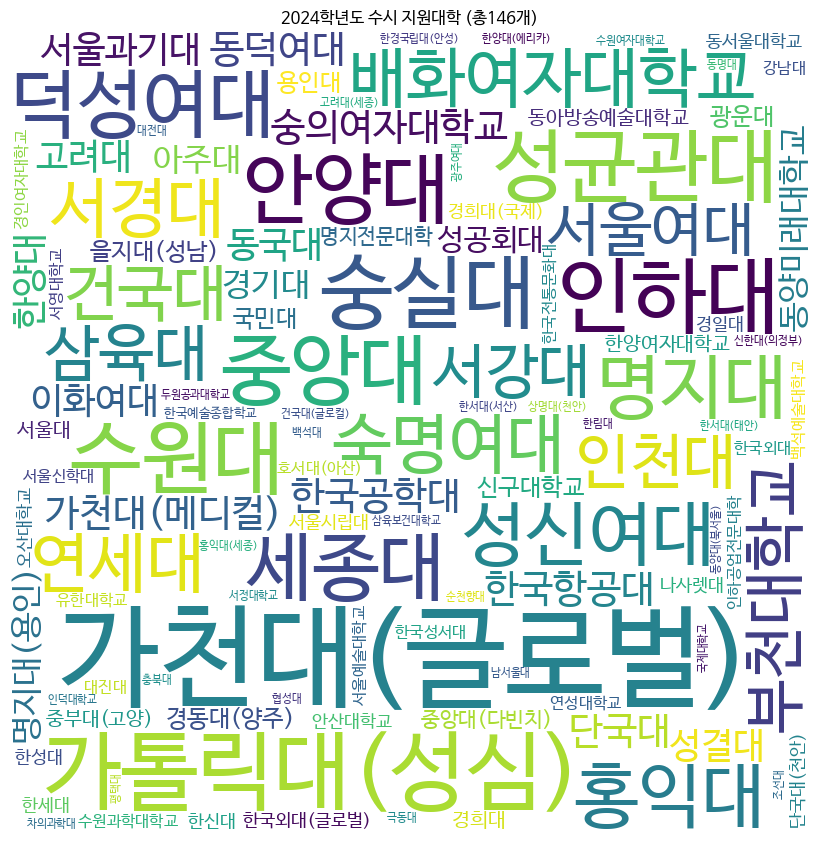

In [51]:
#빈도를 가지고 단어구름(wordcloud): #2024학년도 - 올해

import random
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datetime

# Get the current year
current_year = datetime.datetime.now().year

# Assuming the academic year starts this year and continues into the next year
academic_year = f"{current_year+1}학년도"


random.seed(3)  # set the random seed

path = '/content/drive/MyDrive/python/deungchon/'
df = pd.read_csv(f'{path}susiapply_total.csv', encoding='cp949')

#대학수
df_dup = df.drop_duplicates('대학')
df_freq = len(df_dup['대학'])

wordcloud = WordCloud(font_path='NanumBarunGothic', width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(df['대학'].value_counts())

fig = plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Now update the title string to include the current academic year
plt.title(f"{academic_year} 수시 지원대학 (총{df_freq}개)")


path1 = '/content/drive/MyDrive/python/deungchon/result_d/'
pdf_path = f'{path1}uni_wordcloud.pdf'
plt.savefig(pdf_path, dpi=300, bbox_inches='tight', pad_inches=0)

path2 = '/content/drive/MyDrive/python/deungchon/wordclouds/'
wordcloud.to_file(f'{path2}uni_wordcloud.png')

plt.show()